In [62]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

In [52]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()

Order ID               Product Quantity Ordered Price Each      Order Date  \
0   295665    Macbook Pro Laptop                1       1700  12/30/19 00:01   
1   295666    LG Washing Machine                1      600.0  12/29/19 07:03   
2   295667  USB-C Charging Cable                1      11.95  12/12/19 18:21   
3   295668      27in FHD Monitor                1     149.99  12/22/19 15:13   
4   295669  USB-C Charging Cable                1      11.95  12/18/19 12:38   

                         Purchase Address  
0  136 Church St, New York City, NY 10001  
1     562 2nd St, New York City, NY 10001  
2    277 Main St, New York City, NY 10001  
3     410 6th St, San Francisco, CA 94016  
4           43 Hill St, Atlanta, GA 30301

In [53]:

nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

Order ID Product Quantity Ordered Price Each Order Date Purchase Address
264       NaN     NaN              NaN        NaN        NaN              NaN
648       NaN     NaN              NaN        NaN        NaN              NaN
680       NaN     NaN              NaN        NaN        NaN              NaN
1385      NaN     NaN              NaN        NaN        NaN              NaN
1495      NaN     NaN              NaN        NaN        NaN              NaN

Order ID               Product Quantity Ordered Price Each      Order Date  \
0   295665    Macbook Pro Laptop                1       1700  12/30/19 00:01   
1   295666    LG Washing Machine                1      600.0  12/29/19 07:03   
2   295667  USB-C Charging Cable                1      11.95  12/12/19 18:21   
3   295668      27in FHD Monitor                1     149.99  12/22/19 15:13   
4   295669  USB-C Charging Cable                1      11.95  12/18/19 12:38   

                         Purchase Address  
0  136 Church St, New York City, NY 10001  
1     562 2nd St, New York City, NY 10001  
2    277 Main St, New York City, NY 10001  
3     410 6th St, San Francisco, CA 94016  
4           43 Hill St, Atlanta, GA 30301

In [54]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [55]:
all_data

Order ID                 Product Quantity Ordered Price Each  \
0        295665      Macbook Pro Laptop                1       1700   
1        295666      LG Washing Machine                1      600.0   
2        295667    USB-C Charging Cable                1      11.95   
3        295668        27in FHD Monitor                1     149.99   
4        295669    USB-C Charging Cable                1      11.95   
...         ...                     ...              ...        ...   
186845   222905  AAA Batteries (4-pack)                1       2.99   
186846   222906        27in FHD Monitor                1     149.99   
186847   222907    USB-C Charging Cable                1      11.95   
186848   222908    USB-C Charging Cable                1      11.95   
186849   222909  AAA Batteries (4-pack)                1       2.99   

            Order Date                        Purchase Address  
0       12/30/19 00:01  136 Church St, New York City, NY 10001  
1       12/29/19 07:03     562 2nd St, New York City, NY 10001  
2       12/12/19 18:21    277 Main St, New York City, NY 10001  
3       12/22/19 15:13     410 6th St, San Francisco, CA 94016  
4       12/18/19 12:38           43 Hill St, Atlanta, GA 30301  
...                ...                                     ...  
186845  06/07/19 19:02           795 Pine St, Boston, MA 02215  
186846  06/01/19 19:29   495 North St, New York City, NY 10001  
186847  06/22/19 18:57   319 Ridge St, San Francisco, CA 94016  
186848  06/26/19 18:35    916 Main St, San Francisco, CA 94016  
186849  06/25/19 14:33          209 11th St, Atlanta, GA 30301  

[185950 rows x 6 columns]

In [56]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
all_data.head()

Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop                 1     1700.00   
1   295666    LG Washing Machine                 1      600.00   
2   295667  USB-C Charging Cable                 1       11.95   
3   295668      27in FHD Monitor                 1      149.99   
4   295669  USB-C Charging Cable                 1       11.95   

       Order Date                        Purchase Address  
0  12/30/19 00:01  136 Church St, New York City, NY 10001  
1  12/29/19 07:03     562 2nd St, New York City, NY 10001  
2  12/12/19 18:21    277 Main St, New York City, NY 10001  
3  12/22/19 15:13     410 6th St, San Francisco, CA 94016  
4  12/18/19 12:38           43 Hill St, Atlanta, GA 30301

New Column Month is added

In [57]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop                 1     1700.00   
1   295666    LG Washing Machine                 1      600.00   
2   295667  USB-C Charging Cable                 1       11.95   
3   295668      27in FHD Monitor                 1      149.99   
4   295669  USB-C Charging Cable                 1       11.95   

       Order Date                        Purchase Address  Month  
0  12/30/19 00:01  136 Church St, New York City, NY 10001     12  
1  12/29/19 07:03     562 2nd St, New York City, NY 10001     12  
2  12/12/19 18:21    277 Main St, New York City, NY 10001     12  
3  12/22/19 15:13     410 6th St, San Francisco, CA 94016     12  
4  12/18/19 12:38           43 Hill St, Atlanta, GA 30301     12

Sales Column 

In [60]:
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop                 1     1700.00   
1   295666    LG Washing Machine                 1      600.00   
2   295667  USB-C Charging Cable                 1       11.95   
3   295668      27in FHD Monitor                 1      149.99   
4   295669  USB-C Charging Cable                 1       11.95   

       Order Date                        Purchase Address  Month    Sales  
0  12/30/19 00:01  136 Church St, New York City, NY 10001     12  1700.00  
1  12/29/19 07:03     562 2nd St, New York City, NY 10001     12   600.00  
2  12/12/19 18:21    277 Main St, New York City, NY 10001     12    11.95  
3  12/22/19 15:13     410 6th St, San Francisco, CA 94016     12   149.99  
4  12/18/19 12:38           43 Hill St, Atlanta, GA 30301     12    11.95

City Column 

In [76]:
all_data[['Address','City','Postal Code']] = all_data['Purchase Address'].str.split(',', n=2, expand=True)

all_data.head()

Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop                 1     1700.00   
1   295666    LG Washing Machine                 1      600.00   
2   295667  USB-C Charging Cable                 1       11.95   
3   295668      27in FHD Monitor                 1      149.99   
4   295669  USB-C Charging Cable                 1       11.95   

       Order Date                        Purchase Address  Month    Sales  \
0  12/30/19 00:01  136 Church St, New York City, NY 10001     12  1700.00   
1  12/29/19 07:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12/12/19 18:21    277 Main St, New York City, NY 10001     12    11.95   
3  12/22/19 15:13     410 6th St, San Francisco, CA 94016     12   149.99   
4  12/18/19 12:38           43 Hill St, Atlanta, GA 30301     12    11.95   

         Address            City Postal Code  
0  136 Church St   New York City    NY 10001  
1     562 2nd St   New York City    NY 10001  
2    277 Main St   New York City    NY 10001  
3     410 6th St   San Francisco    CA 94016  
4     43 Hill St         Atlanta    GA 30301

In [79]:
all_data.drop(columns=['Address', 'Postal Code'], inplace=True)

KeyError: "['Address', 'Postal Code'] not found in axis"

In [80]:
all_data.head()

Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop                 1     1700.00   
1   295666    LG Washing Machine                 1      600.00   
2   295667  USB-C Charging Cable                 1       11.95   
3   295668      27in FHD Monitor                 1      149.99   
4   295669  USB-C Charging Cable                 1       11.95   

       Order Date                        Purchase Address  Month    Sales  \
0  12/30/19 00:01  136 Church St, New York City, NY 10001     12  1700.00   
1  12/29/19 07:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12/12/19 18:21    277 Main St, New York City, NY 10001     12    11.95   
3  12/22/19 15:13     410 6th St, San Francisco, CA 94016     12   149.99   
4  12/18/19 12:38           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  
0   New York City  
1   New York City  
2   New York City  
3   San Francisco  
4         Atlanta

Best sales month

In [64]:
results=all_data.groupby('Month').sum()

In [66]:
month=range(1,13)
plt.bar(month,results['Sales'])
plt.title('Sales according to the Months - 2019')
plt.xlabel('Months')
plt.ylabel('Sales in USD($)')
plt.show()

City with most sales

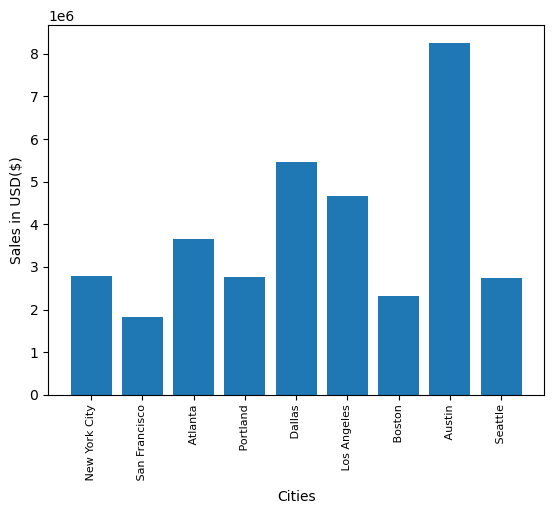

In [91]:
result=all_data.groupby('City').sum()
cities=all_data['City'].unique()
plt.bar(cities,result['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD($)')

plt.show()